<div align="center">

**MSCS 634**

**Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms**

**Peera Tienthong**

</div>

### Step 1: Load and Prepare the Dataset 

In [2]:
# Load wine dataset from sklearn
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable to DataFrame
wine_df['target'] = data.target

# Display the first few rows of the wine dataset
print("First 5 rows of the wine dataset:")
print(wine_df.head())

# Display summary statistics
print("Summary statistics:")
print(wine_df.describe())

# Display information about the dataset
print("Dataset information:")
print(wine_df.info())

First 5 rows of the wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wi

In [3]:
# Basic feature overview
print("Number of samples:", wine_df.shape[0])
print("Number of features:", wine_df.shape[1] - 1)
print("Feature names:")
print(list(wine_df.columns[:-1]))

# Missing value check
print("Missing values per column:")
print(wine_df.isna().sum())

# Class distribution
class_counts = wine_df["target"].value_counts().sort_index()
class_distribution = class_counts.to_frame(name="count")
class_distribution["class_name"] = [data.target_names[i] for i in class_distribution.index]
class_distribution["percent"] = (class_distribution["count"] / class_distribution["count"].sum() * 100).round(2)
print("Class distribution:")
print(class_distribution)

Number of samples: 178
Number of features: 13
Feature names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Missing values per column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
Class distribution:
        count class_name  percent
target                           
0          59    class_0    33.15
1          71    class_1    39.89
2          48    class_2    26.97


In [4]:
# Z-score normalization (standardization)
from sklearn.preprocessing import StandardScaler

feature_df = wine_df.drop(columns=["target"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_df.columns)

print("Scaled feature summary (mean, std):")
print(X_scaled_df.agg(["mean", "std"]).round(4))

Scaled feature summary (mean, std):
      alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
mean  -0.0000     -0.0000 -0.0000            -0.0000    -0.0000   
std    1.0028      1.0028  1.0028             1.0028     1.0028   

      total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
mean         0.0000     -0.0000                0.0000          -0.0000   
std          1.0028      1.0028                1.0028           1.0028   

      color_intensity     hue  od280/od315_of_diluted_wines  proline  
mean           0.0000  0.0000                        0.0000  -0.0000  
std            1.0028  1.0028                        1.0028   1.0028  


### Step 2: Implement K-Means Clustering 

In [5]:
# K-Means clustering with k=3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means cluster counts:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

K-Means cluster counts:
0    65
1    51
2    62
Name: count, dtype: int64


In [6]:
# Calculate silhouette score for K-Means
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.2849


In [7]:
# Calculate Adjusted Rand Index for K-Means
from sklearn.metrics import adjusted_rand_score

kmeans_ari = adjusted_rand_score(wine_df['target'], kmeans_labels)
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.4f}")

K-Means Adjusted Rand Index (ARI): 0.8975


### Step 3: Implement K-Medoids Clustering 

In [8]:
# K-Medoids clustering with k=3
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

print("K-Medoids cluster counts:")
print(pd.Series(kmedoids_labels).value_counts().sort_index())

K-Medoids cluster counts:
0    49
1    55
2    74
Name: count, dtype: int64


In [9]:
# Calculate silhouette score for K-Medoids
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.4f}")

K-Medoids Silhouette Score: 0.2676


In [10]:
# Calculate Adjusted Rand Index for K-Medoids
kmedoids_ari = adjusted_rand_score(wine_df['target'], kmedoids_labels)
print(f"K-Medoids Adjusted Rand Index (ARI): {kmedoids_ari:.4f}")

K-Medoids Adjusted Rand Index (ARI): 0.7411


### Step 4: Visualize and Compare Results 

In [11]:
# Reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

Explained variance ratio: [0.36198848 0.1920749 ]
Total variance explained: 0.5541


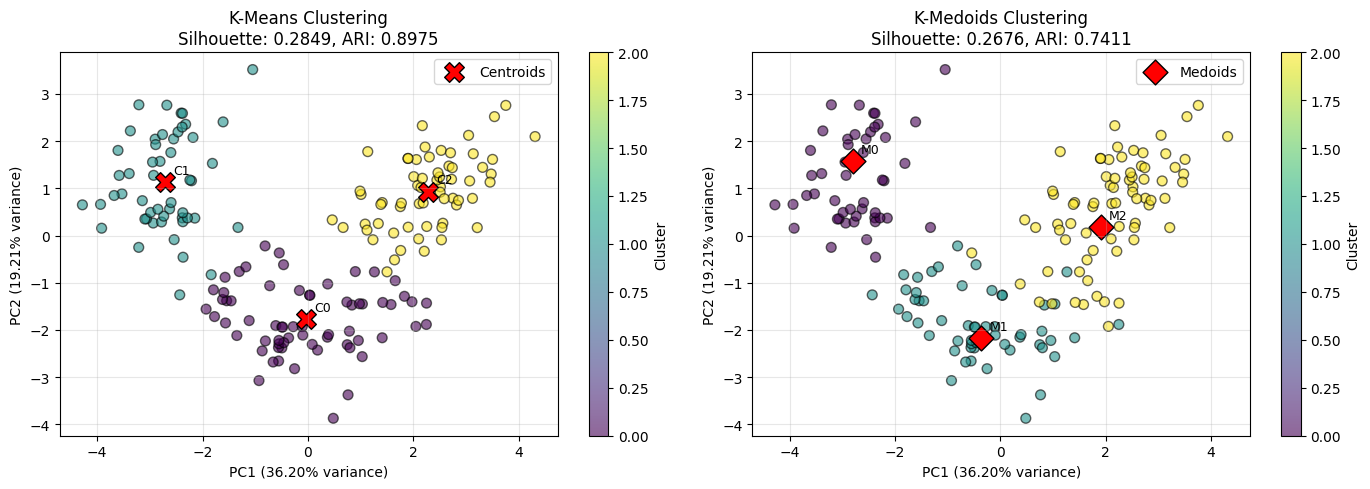

In [14]:
# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Project cluster centers/medoids into PCA space
kmeans_centers_pca = pca.transform(kmeans.cluster_centers_)
kmedoids_centers_pca = pca.transform(kmedoids.cluster_centers_)

# K-Means plot
scatter1 = axes[0].scatter(
    X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis',
    alpha=0.6, edgecolors='k', s=50
 )
axes[0].scatter(
    kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1],
    c='red', marker='X', s=200, edgecolors='k', linewidths=1.0, label='Centroids'
 )
for idx, (x, y) in enumerate(kmeans_centers_pca):
    axes[0].annotate(f'C{idx}', (x, y), textcoords='offset points', xytext=(6, 6), fontsize=9)
axes[0].set_title(f'K-Means Clustering\nSilhouette: {kmeans_silhouette:.4f}, ARI: {kmeans_ari:.4f}')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='best')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# K-Medoids plot
scatter2 = axes[1].scatter(
    X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis',
    alpha=0.6, edgecolors='k', s=50
 )
axes[1].scatter(
    kmedoids_centers_pca[:, 0], kmedoids_centers_pca[:, 1],
    c='red', marker='D', s=160, edgecolors='k', linewidths=1.0, label='Medoids'
 )
for idx, (x, y) in enumerate(kmedoids_centers_pca):
    axes[1].annotate(f'M{idx}', (x, y), textcoords='offset points', xytext=(6, 6), fontsize=9)
axes[1].set_title(f'K-Medoids Clustering\nSilhouette: {kmedoids_silhouette:.4f}, ARI: {kmedoids_ari:.4f}')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='best')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

In [13]:
# Comparison summary table
comparison_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'K-Medoids'],
    'Silhouette Score': [kmeans_silhouette, kmedoids_silhouette],
    'Adjusted Rand Index': [kmeans_ari, kmedoids_ari]
})

print("\nClustering Performance Comparison:")
print(comparison_df.to_string(index=False))


Clustering Performance Comparison:
Algorithm  Silhouette Score  Adjusted Rand Index
  K-Means          0.284859             0.897495
K-Medoids          0.267622             0.741137


### Interpretation of Results
The comparison shows that **K-Means produced better-defined clusters** for this dataset: it achieved a higher silhouette score and a higher Adjusted Rand Index (ARI) than K-Medoids. This indicates tighter separation between clusters and stronger agreement with the true wine class labels.

In the side‑by‑side PCA plots, K‑Means tends to form more compact, roughly spherical clusters centered around the centroids, while K‑Medoids can show slightly less uniform shapes because medoids are constrained to actual data points. You may also notice small shifts in cluster positioning—some points near boundaries get assigned differently—so the K‑Medoids clusters can look a bit more irregular or “data‑driven” compared to the smoother K‑Means partitions.

### When to choose which algorithm?

K-Means is generally preferable when you have large, clean numeric data and expect roughly spherical clusters, because it is fast and the mean is a meaningful representative; however, it is sensitive to outliers. K-Medoids is a better choice when you need robustness to outliers or want cluster centers to be actual data points for interpretability, and it can be more appropriate when means are not meaningful due to mixed features or non-Euclidean distances, even though it typically runs slower.